# First test

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from environment import RULEnvironment_1
from environment_extraReward import RULEnvironment_2
from environment_manyextraRewards import RULEnvironment_3

from stable_baselines3 import DQN 
from stable_baselines3.common.monitor import Monitor, load_results
import pandas as pd
import os

import utils


In [2]:
SWEET_SPOT = 0.30
BAD_SPOT = 0.30
ENVIRONMENT_TYPE = 1 # Can be 1, 2 or 3
TRAIN = False 

In [3]:
# Create log dir
log_dir = f"./pretrained_models/env{ENVIRONMENT_TYPE}/"
os.makedirs(log_dir, exist_ok=True)

### Import the data

In [4]:
data_path = "./data"
data = utils.load_data(data_path)
data.head()

,src,machine,cycle,p1,p2,p3,s1,s2,s3,s4,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
0,train_FD001,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,train_FD001,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,train_FD001,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,train_FD001,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,train_FD001,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [5]:
# Last column is the RUL (Label)
dt_in = list(data.columns[3:-1])
data[dt_in].describe()

,p1,p2,p3,s1,s2,s3,s4,s5,s6,s7,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,...,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000
mean,17.211973,0.410004,95.724344,485.840890,597.361022,1467.035653,1260.956434,9.894999,14.424935,359.729968,...,338.789821,2349.645243,8088.950972,9.054747,0.025185,360.698801,2273.754039,98.389146,25.942709,15.565700
std,16.527988,0.367938,12.359044,30.420388,42.478516,118.175261,136.300073,4.265554,6.443922,174.133835,...,164.193480,111.167242,80.623257,0.751581,0.004997,31.021430,142.513114,4.656270,11.691422,7.015067
min,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.670000,1023.770000,3.910000,5.670000,136.170000,...,128.310000,2027.570000,7845.780000,8.156300,0.020000,302.000000,1915.000000,84.930000,10.160000,6.010500
25%,0.001300,0.000200,100.000000,449.440000,549.960000,1357.360000,1126.830000,5.480000,8.000000,175.710000,...,164.790000,2387.970000,8070.530000,8.439250,0.020000,332.000000,2212.000000,100.000000,14.330000,8.601300
50%,19.998100,0.620000,100.000000,489.050000,605.930000,1492.810000,1271.740000,9.350000,13.660000,341.690000,...,321.690000,2388.070000,8118.590000,9.030100,0.030000,367.000000,2319.000000,100.000000,24.920000,14.953500
75%,35.001500,0.840000,100.000000,518.670000,642.340000,1586.590000,1402.200000,14.620000,21.610000,553.290000,...,521.340000,2388.160000,8139.410000,9.344200,0.030000,392.000000,2388.000000,100.000000,38.820000,23.294600
max,42.008000,0.842000,100.000000,518.670000,645.110000,1616.910000,1441.490000,14.620000,21.610000,570.810000,...,537.490000,2390.490000,8293.720000,11.066900,0.030000,400.000000,2388.000000,100.000000,39.890000,23.950500


In [6]:
# Check for null-values
data[dt_in].isnull().any().any()

# No null values

False

In [7]:
# Standardize all the daa-columns
data_sv = data.copy()
data_sv[dt_in] = (data_sv[dt_in] - data_sv[dt_in].mean()) / data_sv[dt_in].std()
data_sv.head()

,src,machine,cycle,p1,p2,p3,s1,s2,s3,s4,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
0,train_FD001,1,1,-1.041426,-1.115415,0.345954,1.079181,1.046623,1.037987,1.024530,...,0.345198,0.616063,-0.845214,0.963586,1.009019,0.801652,0.345954,1.121959,1.119490,191
1,train_FD001,1,2,-1.041268,-1.115143,0.345954,1.079181,1.054391,1.055926,1.043166,...,0.345648,0.527627,-0.828849,0.963586,1.009019,0.801652,0.345954,1.116827,1.120146,190
2,train_FD001,1,3,-1.041644,-1.113512,0.345954,1.079181,1.059100,1.023517,1.050943,...,0.345288,0.549209,-0.847476,0.963586,0.944547,0.801652,0.345954,1.112550,1.108828,189
3,train_FD001,1,4,-1.041341,-1.114327,0.345954,1.079181,1.059100,0.979514,1.033848,...,0.345738,0.556651,-0.913470,0.963586,1.009019,0.801652,0.345954,1.106563,1.113061,188
4,train_FD001,1,5,-1.041498,-1.114871,0.345954,1.079181,1.059570,0.980022,1.065763,...,0.345378,0.556279,-0.832042,0.963586,1.041254,0.801652,0.345954,1.108273,1.117409,187


In [8]:
data_sv_dict = utils.split_by_field(data_sv, field='src')
print('{{{}}}'.format(', '.join(f'{k}: ...' for k in data_sv_dict.keys())))

{train_FD001: ..., train_FD002: ..., train_FD003: ..., train_FD004: ...}


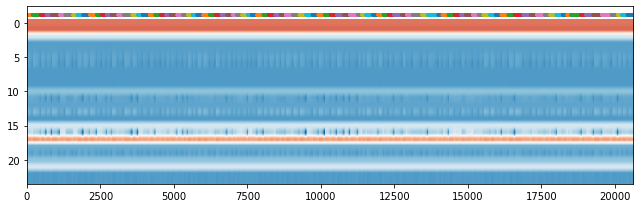

In [9]:
tmp = data_sv_dict['train_FD001']
utils.plot_dataframe(tmp[dt_in], labels=tmp['machine'])

## Train model

### Preprocess train data

### Set up environment

In [10]:
if ENVIRONMENT_TYPE == 1:
    env = RULEnvironment_1(data_sv, dt_in)
elif ENVIRONMENT_TYPE == 2:
    env = RULEnvironment_2(data_sv, dt_in)
elif ENVIRONMENT_TYPE == 3:
    env = RULEnvironment_3(data_sv, dt_in, sweet_spot=SWEET_SPOT, bad_spot=BAD_SPOT)
else:
    raise Exception("Not correct env type")

/usr/local/lib/python3.9/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [11]:
states = env.observation_space.shape
actions = env.action_space.n
states

(24,)

### Train model

In [12]:
if TRAIN:
    env_monitor = Monitor(env, log_dir)
    # Learning starts is the same as warmup in keras-rl2

    # If you want to plot with tensorboard un comment next line: 
    # model = DQN("MlpPolicy", env_monitor, verbose = 1, learning_starts=10000, tensorboard_log="./tensorboard/")

    # If not use this:
    model = DQN("MlpPolicy", env, verbose = 1, learning_starts=10000)
    model.learn(total_timesteps=100000, log_interval=5000)

    # Save model
    path = f'{log_dir}model'
    utils.save_model(model, path)

## Test model

### Set up test environment

In [13]:
data_path = "./data"
data_test = utils.load_data(data_path, test=True)
dt_in_test = list(data_test.columns[3:-1])
data_test.describe()

,machine,cycle,p1,p2,p3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
count,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,...,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000
mean,372.662478,95.406589,17.243810,0.410887,95.748591,485.791314,597.153354,1464.738375,1257.240382,9.887805,...,2349.811235,8084.687648,9.046593,0.025039,360.088096,2273.841797,98.398282,25.949868,15.570426,94.406589
std,201.744654,74.311486,16.530141,0.368078,12.328151,30.426804,42.430629,117.856835,135.728855,4.265536,...,110.890533,78.956087,0.748390,0.005000,30.932463,142.218102,4.644631,11.701010,7.020590,74.311486
min,1.000000,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.410000,1240.940000,1024.900000,3.910000,...,2027.740000,7849.800000,8.198000,0.020000,302.000000,1915.000000,84.930000,10.180000,6.123100,0.000000
25%,197.000000,38.000000,0.001300,0.000200,100.000000,449.440000,549.780000,1355.140000,1124.030000,5.480000,...,2387.950000,8068.360000,8.425600,0.020000,331.000000,2212.000000,100.000000,14.340000,8.607300,37.000000
50%,390.000000,80.000000,19.998200,0.620000,100.000000,489.050000,605.530000,1490.160000,1262.850000,9.350000,...,2388.050000,8113.100000,9.108500,0.030000,367.000000,2319.000000,100.000000,24.780000,14.872400,79.000000
75%,544.000000,135.000000,35.001500,0.840000,100.000000,518.670000,642.200000,1584.810000,1399.460000,14.620000,...,2388.110000,8136.630000,9.333900,0.030000,392.000000,2388.000000,100.000000,38.880000,23.331000,134.000000
max,707.000000,486.000000,42.008000,0.842000,100.000000,518.670000,644.320000,1609.690000,1434.120000,14.620000,...,2389.960000,8243.100000,11.030000,0.030000,398.000000,2388.000000,100.000000,39.750000,23.849600,485.000000


In [14]:
# Check for null-values - no null-values
data_test[dt_in_test].isnull().any().any()

False

In [15]:
# Standardize all the data-columns
data_sv_test = data_test.copy()
data_sv_test[dt_in_test] = (data_sv_test[dt_in_test] - data_sv_test[dt_in_test].mean()) / data_sv_test[dt_in_test].std()
data_sv_test.describe()

,machine,cycle,p1,p2,p3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
count,104897.000000,104897.000000,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,...,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,104897.000000
mean,372.662478,95.406589,8.670360e-18,1.300554e-16,2.460215e-16,-1.929155e-15,-5.505678e-16,-1.140152e-15,-1.586676e-15,-2.731163e-16,...,2.991274e-15,-7.495526e-15,9.190581e-16,-1.764418e-15,-7.066343e-16,1.486967e-15,4.324342e-16,-3.121329e-16,6.762880e-16,94.406589
std,201.744654,74.311486,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,74.311486
min,1.000000,1.000000,-1.043700e+00,-1.117934e+00,-2.899753e+00,-1.340638e+00,-1.455160e+00,-1.898900e+00,-1.711798e+00,-1.401419e+00,...,-2.904407e+00,-2.974915e+00,-1.133891e+00,-1.007737e+00,-1.877901e+00,-2.523179e+00,-2.899753e+00,-1.347736e+00,-1.345660e+00,0.000000
25%,197.000000,38.000000,-1.043095e+00,-1.115760e+00,3.448537e-01,-1.194714e+00,-1.116490e+00,-9.299280e-01,-9.814448e-01,-1.033353e+00,...,3.439317e-01,-2.067940e-01,-8.297717e-01,-1.007737e+00,-9.403744e-01,-4.348377e-01,3.448537e-01,-9.922108e-01,-9.918149e-01,37.000000
50%,390.000000,80.000000,1.666284e-01,5.681230e-01,3.448537e-01,1.070992e-01,1.974198e-01,2.156992e-01,4.132959e-02,-1.260814e-01,...,3.448334e-01,3.598500e-01,8.272022e-02,9.923125e-01,2.234515e-01,3.175278e-01,3.448537e-01,-9.998010e-02,-9.942553e-02,79.000000
75%,544.000000,135.000000,1.074261e+00,1.165823e+00,3.448537e-01,1.080583e+00,1.061654e+00,1.018792e+00,1.047822e+00,1.109402e+00,...,3.453745e-01,6.578638e-01,3.839000e-01,9.923125e-01,1.031664e+00,8.026981e-01,3.448537e-01,1.105044e+00,1.105402e+00,134.000000
max,707.000000,486.000000,1.498123e+00,1.171256e+00,3.448537e-01,1.080583e+00,1.111618e+00,1.229896e+00,1.303184e+00,1.109402e+00,...,3.620576e-01,2.006335e+00,2.650231e+00,9.923125e-01,1.225635e+00,8.026981e-01,3.448537e-01,1.179397e+00,1.179270e+00,485.000000


In [16]:
if ENVIRONMENT_TYPE == 1:
    env_test = RULEnvironment_1(data_sv_test, dt_in_test)
elif ENVIRONMENT_TYPE == 2:
    env_test = RULEnvironment_2(data_sv_test, dt_in_test)
elif ENVIRONMENT_TYPE == 3:
    env_test = RULEnvironment_3(data_sv_test, dt_in_test, sweet_spot=SWEET_SPOT, bad_spot=BAD_SPOT)
else:
    raise Exception("Not correct env type")

/usr/local/lib/python3.9/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [17]:
nb_episodes = data_sv_test['machine'].max()

### Load trained model

In [18]:
if 'model' in locals():
    print('Deleting model')
    del model

In [19]:
# If the model is supposed to be trained on, env need to be set. 
# If it's only going to be used for prediction, it can be None
model = utils.load_model(f'{log_dir}/model.zip', env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


### Evaluate model on testset

In [20]:
# Evaluate for all 707 episodes
mean_episode_reward, all_episode_rewards, all_nr_of_actions = utils.evaluate(model, env_test, nb_episodes)

Mean reward: -3.8444130127298446 Num episodes: 707


#### Make result dataframe

In [21]:
machine_max_rul = data_sv_test.groupby(['machine'])['rul'].max()
df = utils.create_results_dataframe(machine_max_rul, all_episode_rewards, all_nr_of_actions)
# Observe the max_RUL
df.describe()

,machine,reward,num_actions,max_RUL,slack,reward_estimate
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,354.000000,-3.844413,38.087694,147.369165,109.281471,-0.559788
std,204.237607,131.793946,35.372493,78.471162,82.222311,3.262866
min,1.000000,-467.000000,1.000000,18.000000,0.000000,-24.580000
25%,177.500000,7.000000,12.000000,87.500000,47.000000,0.050000
50%,354.000000,22.000000,28.000000,141.000000,103.000000,0.160000
75%,530.500000,45.000000,54.000000,186.000000,157.000000,0.360000
max,707.000000,215.000000,215.000000,485.000000,464.000000,1.000000


In [22]:
# Save dataframe
utils.save_dataframe(df, log_dir)

## Plot results
- With avrg slack of 67% the machine stops at 33% of total possible runtime. It stops after only 1/3 of what the machine is able to run.

In [23]:
log_dir

'./pretrained_models/env1/'

In [24]:
df = pd.read_csv(f'{log_dir}results.csv')

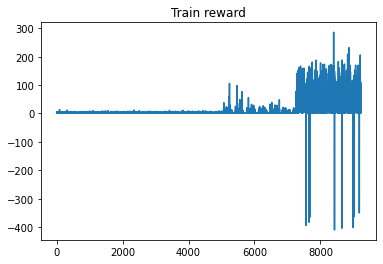

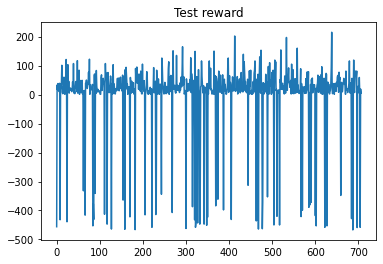

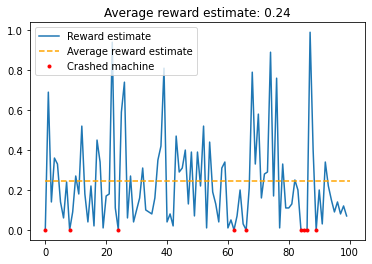

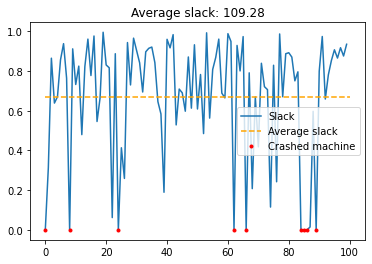

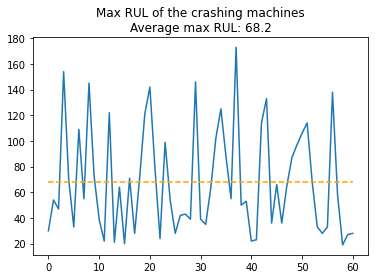

In [25]:
stop = 100
# Reward
utils.plot_train_reward(log_dir)
utils.plot_test_reward(df)

# Plot average reward
utils.plot_average_reward(df, stop=stop)

# Slack
utils.plot_slack(df, stop=stop)

# Plot the max RUL for the crashing machines
utils.plot_crash_points_max_rul(df)


In [26]:
utils.environment_results(df)

percent_of_crashed_machines: 0.0863
stop_within_sweetspot: 0.0622


### Plot test results

In [27]:
# It almost doesn't dare going above the mean. The only cases:
df[df['num_actions'] > df['max_RUL'].mean()]

,Unnamed: 0,machine,reward,num_actions,max_RUL,slack,reward_estimate
62,62,63,-332,154,154,0,0.00
270,270,271,151,151,242,91,0.62
292,292,293,165,165,244,79,0.68
321,321,322,149,149,179,30,0.83
365,365,366,150,150,157,7,0.96
413,413,414,202,202,202,0,1.00
444,444,445,-313,173,173,0,0.00
474,474,475,153,153,239,86,0.64
520,520,521,154,154,239,85,0.64
533,533,534,197,197,202,5,0.98


In [28]:
# Only about 1% of the times it goes above the mean max_RUL
len(df[df['num_actions'] > df['max_RUL'].mean()]) / len(df[df['max_RUL'] > df['max_RUL'].mean()])

0.037267080745341616

In [29]:
df[df['num_actions'] < (BAD_SPOT * df['max_RUL'])]

,Unnamed: 0,machine,reward,num_actions,max_RUL,slack,reward_estimate
2,2,3,17,17,125,108,0.14
5,5,6,15,15,104,89,0.14
6,6,7,10,10,159,149,0.06
7,7,8,39,39,165,126,0.24
9,9,10,17,17,191,174,0.09
...,...,...,...,...,...,...,...
700,700,701,30,30,111,81,0.27
701,701,702,6,6,198,192,0.03
703,703,704,4,4,62,58,0.06
705,705,706,19,19,93,74,0.20
